# Customer Segmentation Using Unsupervised Learning 

In [37]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load data from Excel workbook

In [2]:
# Load the Customers and Transactions sheets from the Excel workbook into pandas DataFrames.
file_path = 'E-commerce_data.xlsx'
customers = pd.read_excel(file_path,sheet_name='customers')
transactions = pd.read_excel(file_path,sheet_name='transactions')

 exploring data sheets

In [3]:
customers.head()

,customer_id,join_date,city_id,gender_id
0,1,2022-01-08,7,1
1,2,2023-05-02,20,2
2,3,2023-05-14,15,1
3,4,2022-11-25,11,2
4,5,2023-04-26,8,1


In [4]:
customers.shape

(1000, 4)

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  1000 non-null   int64         
 1   join_date    1000 non-null   datetime64[ns]
 2   city_id      1000 non-null   int64         
 3   gender_id    1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB


In [6]:
transactions.head()

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6


 check null values

In [7]:
transactions.shape

(5000, 7)

In [8]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      5000 non-null   int64         
 1   customer_id         5000 non-null   int64         
 2   transaction_date    5000 non-null   datetime64[ns]
 3   transaction_status  5000 non-null   object        
 4   coupon_name         5000 non-null   object        
 5   burn_date           2516 non-null   datetime64[ns]
 6   branch_id           5000 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 273.6+ KB


In [9]:
customers.isna().sum()

customer_id    0
join_date      0
city_id        0
gender_id      0
dtype: int64

In [7]:
transactions.head()

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6


In [4]:
transactions.isna().sum()

transaction_id           0
customer_id              0
transaction_date         0
transaction_status       0
coupon_name              0
burn_date             2484
branch_id                0
dtype: int64

 check duplicate values

In [10]:
customers.duplicated().sum()

0

In [11]:
transactions.duplicated().sum()

0

# Step 2: Aggregate transactional data

In [3]:
# # Group transactions by customer_id and calculate the total number of transactions, the date of the last transaction,
# and the count of claimed and burnt coupons for each customer.
transactions_agg = transactions.groupby('customer_id').agg(
    transaction_count = ('transaction_id','count'),
    last_transaction_date = ('transaction_date','max'),
    subscribed_count = ('transaction_status', lambda x: (x == 'subscribed').sum()),
    burned_count = ('transaction_status', lambda x: (x == 'burned').sum())
)

In [4]:
transactions_agg

,transaction_count,last_transaction_date,subscribed_count,burned_count
customer_id,,,,
1,7,2024-05-26,4,3
2,3,2023-10-21,2,1
3,5,2024-07-05,4,1
4,1,2023-01-15,1,0
5,4,2024-07-02,1,3
...,...,...,...,...
996,3,2024-05-09,3,0
997,3,2024-01-23,2,1
998,4,2024-06-27,1,3


# Step 3: Calculate recency

In [5]:
# Calculate the number of days since the last transaction for each customer.
transactions_agg['recency'] = (pd.to_datetime('today') - pd.to_datetime(transactions_agg['last_transaction_date'])).dt.days

# Step 4: Merge with customer demographics

In [6]:
# Merge the aggregated transactional data with the Customers table to include demographic features
customer_data = pd.merge(customers,transactions_agg,on='customer_id')

In [22]:
customer_data.head()

,customer_id,join_date,city_id,gender_id,transaction_count,last_transaction_date,subscribed_count,burned_count,recency
0,1,2022-01-08,7,1,7,2024-05-26,4,3,285
1,2,2023-05-02,20,2,3,2023-10-21,2,1,503
2,3,2023-05-14,15,1,5,2024-07-05,4,1,245
3,4,2022-11-25,11,2,1,2023-01-15,1,0,782
4,5,2023-04-26,8,1,4,2024-07-02,1,3,248


# Step 5: Select features

In [7]:
# Select the relevant features for clustering, including demographic and transactional features.
features = customer_data[['gender_id','city_id','transaction_count','subscribed_count','burned_count','recency']]

# Normalize the data to ensure all features contribute equally to the clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features = pd.DataFrame(scaled_features,columns=features.columns)

In [8]:
scaled_features

,gender_id,city_id,transaction_count,subscribed_count,burned_count,recency
0,-0.980970,-0.531909,0.855575,0.926711,0.293019,-0.421374
1,1.019399,1.677704,-0.904516,-0.318557,-0.992105,1.192314
2,-0.980970,0.827853,-0.024470,0.926711,-0.992105,-0.717463
3,1.019399,0.147972,-1.784562,-0.941191,-1.634667,3.257538
4,-0.980970,-0.361939,-0.464493,-0.941191,0.293019,-0.695256
...,...,...,...,...,...,...
984,-0.980970,-1.211790,-0.904516,0.304077,-1.634667,-0.295536
985,1.019399,1.677704,-0.904516,-0.318557,-0.992105,0.496504
986,1.019399,0.147972,-0.464493,-0.941191,0.293019,-0.658245
987,-0.980970,-0.701879,-0.464493,-1.563826,0.935580,-0.073469


# Step 6: Determine optimal number of clusters

In [11]:
# Use the Elbow Method to find the optimal number of clusters by plotting the sum of squares for different numbers of clusters.
sse = []
for k in range(1,11):
    kmean_model = KMeans(n_clusters=k,random_state=0,init='k-means++',max_iter=300,n_init=10)
    kmean_model.fit(scaled_features)
    sse.append(kmean_model.inertia_)

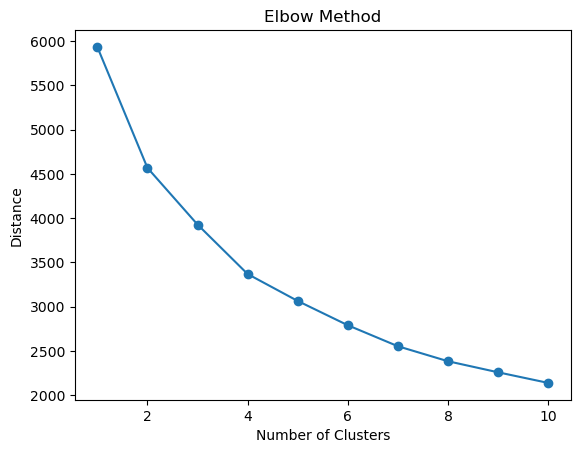

In [12]:
# Plot the Elbow Method graph to visualize the optimal number of clusters.
plt.plot(range(1,11),sse,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Distance')
plt.show()

# Step 7: Train K-means model

In [13]:
# Train the K-means clustering model with the optimal number of clusters (6 clusters).
kmean_model = KMeans(n_clusters=6,random_state=0,init='k-means++',max_iter=300,n_init=10)
clusters = kmean_model.fit_predict(scaled_features)

# Step 8: Add cluster labels to the original data

In [14]:
# Add the cluster labels to the customer_data DataFrame 
# to identify which cluster each customer belongs to.
customer_data['clusters'] = clusters
customer_data

,customer_id,join_date,city_id,gender_id,transaction_count,last_transaction_date,subscribed_count,burned_count,recency,clusters
0,1,2022-01-08,7,1,7,2024-05-26,4,3,285,5
1,2,2023-05-02,20,2,3,2023-10-21,2,1,503,1
2,3,2023-05-14,15,1,5,2024-07-05,4,1,245,3
3,4,2022-11-25,11,2,1,2023-01-15,1,0,782,2
4,5,2023-04-26,8,1,4,2024-07-02,1,3,248,3
...,...,...,...,...,...,...,...,...,...,...
984,996,2022-10-28,3,1,3,2024-05-09,3,0,302,3
985,997,2022-07-07,20,2,3,2024-01-23,2,1,409,1
986,998,2024-03-09,11,2,4,2024-06-27,1,3,253,1
987,999,2022-07-16,6,1,4,2024-04-09,0,4,332,3


# Step 9: Segment Analysis and Recommendations

In [16]:
# Analyze clusters
cluster_analysis = customer_data.groupby('clusters').mean()

# Print cluster analysis
print("Cluster Analysis:\n")
print(cluster_analysis)

Cluster Analysis:

          customer_id                     join_date    city_id  gender_id  \
clusters                                                                    
0          520.140625 2023-02-13 09:45:00.000000000  11.593750   1.250000   
1          502.520958 2023-01-22 14:13:39.161676544  15.053892   2.000000   
2          448.464286 2022-03-19 21:42:51.428571392   9.809524   1.500000   
3          482.650376 2023-03-05 05:30:13.533834496   9.586466   1.000000   
4          536.237838 2023-02-18 04:24:38.918918912   4.924324   2.000000   
5          499.408805 2023-01-14 08:09:03.396226304  10.911950   1.371069   

          transaction_count         last_transaction_date  subscribed_count  \
clusters                                                                      
0                  6.835938 2024-05-09 05:48:45.000000000          1.968750   
1                  3.832335 2024-04-23 00:00:00.000000000          1.880240   
2                  2.535714 2023-04-21 23:42:51.

In [35]:
# Analyze ans describe each segment
segment_descriptions = []
recommendations = []

for cluster in cluster_analysis.index:
    description = f"\nSegment {cluster}:"
    description += f"\n- Average Transaction Count: {cluster_analysis.loc[cluster, 'transaction_count']:.2f}"
    description += f"\n- Average Recency (days): {cluster_analysis.loc[cluster, 'recency']:.2f}"
    description += f"\n- Average Claimed Coupons: {cluster_analysis.loc[cluster, 'subscribed_count']:.2f}"
    description += f"\n- Average Burnt Coupons: {cluster_analysis.loc[cluster, 'burned_count']:.2f}"
    
    if cluster_analysis.loc[cluster, 'burned_count'] > cluster_analysis['burned_count'].mean():
        recommendation = f"\nSegment {cluster} shows high coupon usage. Recommend offering exclusive discounts and loyalty rewards to retain these customers."
    elif cluster_analysis.loc[cluster, 'subscribed_count'] > cluster_analysis['subscribed_count'].mean():
        recommendation = f"\nSegment {cluster} claims many coupons but burns fewer. Recommend sending reminders and limited-time offers to encourage coupon usage."
    else:
        recommendation = f"\nSegment {cluster} shows lower engagement. Recommend targeted marketing campaigns and special offers to increase activity."

    segment_descriptions.append(description)
    recommendations.append(recommendation)

In [36]:
# Print segment descriptions and recommendations
for description, recommendation in zip(segment_descriptions, recommendations):
    print(description)
    print(recommendation)


Segment 0:
- Average Transaction Count: 6.84
- Average Recency (days): 301.76
- Average Claimed Coupons: 1.97
- Average Burnt Coupons: 4.87

Segment 0 shows high coupon usage. Recommend offering exclusive discounts and loyalty rewards to retain these customers.

Segment 1:
- Average Transaction Count: 3.83
- Average Recency (days): 318.00
- Average Claimed Coupons: 1.88
- Average Burnt Coupons: 1.95

Segment 1 shows lower engagement. Recommend targeted marketing campaigns and special offers to increase activity.

Segment 2:
- Average Transaction Count: 2.54
- Average Recency (days): 685.01
- Average Claimed Coupons: 1.19
- Average Burnt Coupons: 1.35

Segment 2 shows lower engagement. Recommend targeted marketing campaigns and special offers to increase activity.

Segment 3:
- Average Transaction Count: 3.75
- Average Recency (days): 318.42
- Average Claimed Coupons: 2.00
- Average Burnt Coupons: 1.75

Segment 3 shows lower engagement. Recommend targeted marketing campaigns and specia